In [1]:
"""
Plot heatmaps of SP shape encoding, split by location.
For paper figure
"""

'\nPlot heatmaps of SP shape encoding, split by location.\nFor paper figure\n'

In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load DFallPa dataset

In [ ]:
##### Method: loading functrion"

In [ ]:
from neuralmonkey.classes.population_mult import load_handsaved_wrapper, dfpa_concatbregion_preprocess_wrapper,dfpa_match_chans_across_pa_each_bregion
from neuralmonkey.classes.population_mult import extract_single_pa


In [ ]:
# Method 1 - load a single DFallPA


# animal = "Diego"
# # date = 230615
# date = 240510
# combine = True
# question = "SP_BASE_trial"
# version = "trial"

animal = "Diego"
date = 230615
# date = 230618
combine = True
question = "SP_BASE_trial"
version = "trial"

# animal = "Pancho"
# date = 220606
# combine = True
# question = "SP_BASE_trial"
# version = "trial"

DFallpa = load_handsaved_wrapper(animal, date, version=version, combine_areas=combine, question=question)


In [ ]:
dfpa_concatbregion_preprocess_wrapper(DFallpa, animal, date)


In [ ]:
DFallpa

In [ ]:
PA = DFallpa["pa"].values[1]

In [ ]:
from neuralmonkey.scripts.analy_shape_invariance_all_plots_SP import preprocess_pa

var_other = "gridsize"
var_context_same = "seqc_0_loc"

remove_drift=True
subspace_projection = "shape"
subspace_projection_fitting_twind = (0.05, 0.9)
twind_analy = (-0.5, 1.0)
tbin_dur = 0.2
tbin_slide = 0.05
savedir = "/tmp"
PAthis = preprocess_pa(PA, animal, date, var_other, savedir, remove_drift, subspace_projection, subspace_projection_fitting_twind, 
                twind_analy, tbin_dur, tbin_slide, var_context_same=var_context_same)


In [ ]:
label_grp_vars = ["seqc_0_shape", "seqc_0_loc", "gridsize"]
fraction_constrained_set=0.75
n_constrained=2
list_labels_need_n=None
min_frac_datapts_unconstrained=None
min_n_datapts_unconstrained=1
plot_train_test_counts=True
plot_indices=True
nsplits=2
folds, fig_unc, fig_con = PAthis.split_stratified_constrained_grp_var(nsplits, label_grp_vars, fraction_constrained_set, n_constrained, 
                                             list_labels_need_n, min_frac_datapts_unconstrained,  
                                             min_n_datapts_unconstrained, plot_train_test_counts, plot_indices);

##### Quick, testing heatmap code

In [ ]:
from neuralmonkey.neuralplots.population import heatmapwrapper_many_useful_plots
import os
savedir = "/tmp/TESTTEST"
os.makedirs(savedir, exist_ok=True)
diverge = True
heatmapwrapper_many_useful_plots(PAthis, savedir, var_is_blocks=False, mean_over_trials=True, flip_rowcol=True, plot_fancy=True,
    diverge=diverge)

##### Compute euclidian (for shape, controlling for size)

In [ ]:
# Prune to scalar window
twind_scal = (0.05, 1.0)
pa = PAthis.slice_by_dim_values_wrapper("times", twind_scal)


In [ ]:
dflab = pa.Xlabels["trials"]
from pythonlib.tools.pandastools import grouping_plot_n_samples_conjunction_heatmap
grouping_plot_n_samples_conjunction_heatmap(dflab, "seqc_0_shape", "seqc_0_loc", ["gridsize"])

In [ ]:
from neuralmonkey.analyses.euclidian_distance import timevarying_compute_fast_to_scalar
var_effect = "seqc_0_shape"

# var_other = "seqc_0_loc"
# var_context_same = "gridsize"

var_other = "gridsize"
var_context_same = "seqc_0_loc"

label_vars =  (var_effect, var_other)
dfdist, Cldist = timevarying_compute_fast_to_scalar(pa, label_vars, "/tmp", var_context_same=var_context_same)

### Plot RSA heatmap

In [ ]:
from neuralmonkey.analyses.euclidian_distance import timevarying_compute_fast_to_scalar
label_vars =  ("seqc_0_shape", "seqc_0_loc")
timevarying_compute_fast_to_scalar(pa, label_vars, "/tmp")

In [ ]:
list_dims = [(0,1), (1,2), (2,3)]
PAthis.plot_state_space_good_wrapper("/tmp", ["seqc_0_shape"], [["seqc_0_loc"]], PLOT_CLEAN_VERSION=True,
                                     list_dims=list_dims)

# Plot heatmaps

In [ ]:
import os
SAVEDIR = "/tmp/TEST3"
os.makedirs(SAVEDIR, exist_ok=True)

In [ ]:
# GOOD PLOTS
from neuralmonkey.scripts.analy_shape_invariance_all_plots_SP import heatmaps_plot_wrapper
heatmaps_plot_wrapper(DFallpa, animal, date, SAVEDIR, "seqc_0_loc")

##### Devo

In [ ]:
# Each PC, convert to zscore


In [ ]:
# make this a grid of (dims, locs)
vars_subplots = ["seqc_0_loc"]
var = "seqc_0_shape"
dims = [0,1,2]
panorm.plotwrappergrid_smoothed_fr_splot_neuron(var, vars_subplots, dims);


In [ ]:
var_col = "seqc_0_shape"
var_row = "seqc_0_loc"
chans = [1]


panorm.plotwrappergrid_smoothed_fr_splot_var(var_row, var_col, chans, plot_indiv=True)
# pathis.plotwrappergrid_smoothed_fr_splot_var(var_row, var_col, chans)

In [ ]:
# IGNORE --- this is using old code, which is now replaced by the new PA code above.
from neuralmonkey.analyses.state_space_good import trajgood_construct_df_from_raw, trajgood_plot_colorby_splotby_timeseries
PA_traj = panorm
var = "seqc_0_shape"
var_others = "seqc_0_loc"
_vars = ["seqc_0_shape", "seqc_0_loc"]
list_dim_timecourse = [1,2,3]
plot_trials_n = 2
df = trajgood_construct_df_from_raw(PA_traj.X, PA_traj.Times, PA_traj.Xlabels["trials"], _vars)

for dim in list_dim_timecourse:

    # - (i) combined, plotting means.
    fig, _ = trajgood_plot_colorby_splotby_timeseries(df, var, var_others, dim=dim,
                                                    plot_trials_n=plot_trials_n, 
                                                    SUBPLOT_OPTION="split_levs")
    # path = f"{sdir}/TIMECOURSEsplit-color={var}-sub={var_others}-dim={dim}-suff={i_var}.pdf"
    # print("Saving ... ", path)
    # savefig(fig, path)

    # - (2) split
    fig, _ = trajgood_plot_colorby_splotby_timeseries(df, var, var_others, dim=dim, plot_trials_n=plot_trials_n,
                                            plot_trials=False, SUBPLOT_OPTION="combine_levs")
    # path = f"{sdir}/TIMECOURSEcomb-color={var}-sub={var_others}-dim={dim}-suff={i_var}.pdf"
    # print("Saving ... ", path)
    # savefig(fig, path)
    
    # plt.close("all")

    assert False



### Running euclidian plots (and extraction/computation)

In [ ]:
PA = DFallpa["pa"].values[0]

In [ ]:
dur = 0.2
slide = 0.01
PA = PA.agg_by_time_windows_binned(dur, slide)

In [ ]:
var_effect = "seqc_0_shape"
var_other = "seqc_0_loc"
vars_group = [var_effect, var_other]
version = "traj"
DFDIST = PA.dataextractwrap_distance_between_groups(vars_group, version)


In [ ]:
from pythonlib.tools.pandastools import append_col_with_grp_index
for var in [var_effect, var_other]:
    DFDIST[f"{var}_same"] = DFDIST[f"{var}_1"] == DFDIST[f"{var}_2"]
    DFDIST = append_col_with_grp_index(DFDIST, [f"{var}_1", f"{var}_2"], f"{var}_12")
DFDIST = append_col_with_grp_index(DFDIST, [f"{var_other}_same", f"{var_effect}_same"], f"same-{var_other}|{var_effect}")
# DFDIST = append_col_with_grp_index(DFDIST, [f"{var_effect}_same", f"{var_other}_same"], f"same-{var_effect}|{var_other}")



In [ ]:
DFDIST

In [ ]:
import seaborn as sns
for y in ["dist_mean", "dist_norm", "dist_yue_diff"]:
    # sns.relplot(data=DFDIST, x="time_bin", y=y, hue="same_shape|task_kind_12", kind="line", errorbar=("ci", 68))
    fig = sns.relplot(data=DFDIST, x="time_bin", y=y, hue="same-seqc_0_loc|seqc_0_shape", kind="line", errorbar=("ci", 68))
    # savefig(fig, f"{SAVEDIR}/relplot-{y}-1.pdf")

    if False: # slow, and I don't use
        fig = sns.relplot(data=DFDIST, x="time_bin", y=y, hue="same_shape|task_kind_12", kind="line", errorbar=("ci", 68))
        savefig(fig, f"{SAVEDIR}/relplot-{y}-2.pdf")

        fig = sns.relplot(data=DFDIST, x="time_bin", y=y, hue="task_kind_12", kind="line", col="same-task|shape", errorbar=("ci", 68))
        savefig(fig, f"{SAVEDIR}/relplot-{y}-3.pdf")

        fig = sns.relplot(data=DFDIST, x="time_bin", y=y, hue=f"{shape_var}_12", kind="line", col="same-task|shape", 
                    errorbar=("ci", 68), legend=False, alpha=0.5)
        savefig(fig, f"{SAVEDIR}/relplot-{y}-4.pdf")

    # plt.close("all")


In [ ]:
import seaborn as sns
for y in ["dist_mean", "dist_norm", "dist_yue_diff"]:
    # sns.relplot(data=DFDIST, x="time_bin", y=y, hue="same_shape|task_kind_12", kind="line", errorbar=("ci", 68))
    fig = sns.relplot(data=DFDIST, x="time_bin", y=y, hue="same-seqc_0_loc|seqc_0_shape", kind="line", errorbar=("ci", 68))
    # savefig(fig, f"{SAVEDIR}/relplot-{y}-1.pdf")

    if False: # slow, and I don't use
        fig = sns.relplot(data=DFDIST, x="time_bin", y=y, hue="same_shape|task_kind_12", kind="line", errorbar=("ci", 68))
        savefig(fig, f"{SAVEDIR}/relplot-{y}-2.pdf")

        fig = sns.relplot(data=DFDIST, x="time_bin", y=y, hue="task_kind_12", kind="line", col="same-task|shape", errorbar=("ci", 68))
        savefig(fig, f"{SAVEDIR}/relplot-{y}-3.pdf")

        fig = sns.relplot(data=DFDIST, x="time_bin", y=y, hue=f"{shape_var}_12", kind="line", col="same-task|shape", 
                    errorbar=("ci", 68), legend=False, alpha=0.5)
        savefig(fig, f"{SAVEDIR}/relplot-{y}-4.pdf")

    # plt.close("all")


In [ ]:
# Scalar values
from neuralmonkey.analyses.euclidian_distance import compute_scalar_from_time_varying, timevarying_compute
compute_scalar_from_time_varying

In [ ]:
DFDIST = timevarying_compute(PA, vars_group)

In [ ]:
for y in ["dist_mean", "dist_norm", "dist_yue_diff"]:
    # sns.relplot(data=DFDIST, x="time_bin", y=y, hue="same_shape|task_kind_12", kind="line", errorbar=("ci", 68))
    fig = sns.relplot(data=DFDIST, x="time_bin", y=y, hue="same-seqc_0_shape|seqc_0_loc", kind="line", errorbar=("ci", 68))
    # savefig(fig, f"{SAVEDIR}/relplot-{y}-1.pdf")


In [ ]:
DFDIST

In [ ]:
dfscal =timevarying_convert_to_scalar(DFDIST)

In [ ]:
from pythonlib.tools.pandastools import plot_45scatter_means_flexible_grouping

plot_45scatter_means_flexible_grouping()

In [ ]:
from  neuralmonkey.scripts.analy_shape_invariance_all_plots_SP import euclidian_time_resolved, preprocess_pa, _preprocess_pa_dim_reduction


In [ ]:

SAVEDIR_ANALYSIS = "/tmp/EUCLD"
euclidian_time_resolved(DFallpa, animal, date, var_other, SAVEDIR_ANALYSIS)

# [#4] Euclidian, doing stats (and faster way to compute)

In [ ]:
import os

In [ ]:
SAVEDIR_ANALYSIS = "/tmp/EUCL2"
os.makedirs(SAVEDIR_ANALYSIS, exist_ok=True)

In [ ]:
from neuralmonkey.scripts.analy_shape_invariance_all_plots_SP import euclidian_time_resolved_fast_shuffled
var_other = "gridsize"
var_context_same = "seqc_0_loc"
euclidian_time_resolved_fast_shuffled(DFallpa, animal, date, var_other, SAVEDIR_ANALYSIS, var_context_same=var_context_same)

##### [Devo]

# [#4.3] [Load for shuffle, each run's cached data --> STATS

In [ ]:
import pickle
import os
from pythonlib.tools.plottools import savefig

In [ ]:
from neuralmonkey.scripts.analy_shape_invariance_all_plots_SP import euclidian_time_resolved_fast_shuffled_mult_reload


In [ ]:
animal = "Diego"
date = 230615
var_other = "seqc_0_loc"

list_dfdist, list_dfdist_shuff, SAVEDIR_PLOTS = euclidian_time_resolved_fast_shuffled_mult_reload(animal, date, var_other)

### [Stats method #1] -- Trial-by-trial shuffles from euclidian_time_resolved_fast_shuffled()

This is from the really slow shuffling of all trials, and then using that distribution (each shuff gives one value) to compute empirical p value.

This is the only one of the methods that uses the shuffled data.


In [ ]:
from neuralmonkey.neuralplots.brainschematic import datamod_reorder_by_bregion
from pythonlib.tools.pandastools import append_col_with_grp_index
from pythonlib.tools.pandastools import aggregGeneral
import pandas as pd
import matplotlib.pyplot as plt

# Run separately for each bregion
# bregion = "PMv"
list_bregion = sorted(set([dfdist["bregion"].unique()[0] for dfdist in list_dfdist]))
for bregion in list_bregion:
    print(bregion)

    savedir = f"{SAVEDIR_PLOTS}/bregion={bregion}"
    os.makedirs(savedir, exist_ok=True)

    list_dfdist_this = [dfdist for dfdist in list_dfdist if dfdist["bregion"].unique()[0]==bregion]
    list_dfdist_shuff_this = [dfdist for dfdist in list_dfdist_shuff if dfdist["bregion"].unique()[0]==bregion]

    # First, generate all df
    print("concatting...")
    DFDISTS = pd.concat(list_dfdist_this).reset_index(drop=True)
    DFDISTS_SHUFF = pd.concat(list_dfdist_shuff_this).reset_index(drop=True)
    DFDISTS = datamod_reorder_by_bregion(DFDISTS)
    DFDISTS_SHUFF = datamod_reorder_by_bregion(DFDISTS_SHUFF)

    print("appending...")
    DFDISTS = append_col_with_grp_index(DFDISTS, ["subspace_projection", "subspace_projection_fitting_twind"], "subspace|twind")
    DFDISTS_SHUFF = append_col_with_grp_index(DFDISTS_SHUFF, ["subspace_projection", "subspace_projection_fitting_twind"], "subspace|twind")
    DFDISTS_SHUFF = append_col_with_grp_index(DFDISTS_SHUFF, ["dim_redu_fold", "shuffle_iter"], "drfold|shuffiter")

    DFDISTS = append_col_with_grp_index(DFDISTS, ["shuffled", "shuffle_ver"], "shuffled|ver")
    DFDISTS_SHUFF = append_col_with_grp_index(DFDISTS_SHUFF, ["shuffled", "shuffle_ver"], "shuffled|ver")

    print("agging...")
    # Agg over all dim redu splits
    DFDISTS = aggregGeneral(DFDISTS, ["bregion", "which_level", "event", "subspace|twind", "labels_1", "labels_2"], 
                            ["dist_mean", "dist_norm", "dist_yue_diff", "DIST_50", "DIST_98"], nonnumercols="all")


    # Agg over all conditions (e.g. label pairs)
    DFDISTS_AGG = aggregGeneral(DFDISTS, ["bregion", "which_level", "event", "subspace|twind", "same-seqc_0_shape|seqc_0_loc"],
                                ["dist_mean", "dist_norm", "dist_yue_diff", "DIST_50", "DIST_98"], nonnumercols="all")


    # Get distribition over shuffs
    # - go straight to agg, this is correct for shuff
    DFDISTS_SHUFF_AGG = aggregGeneral(DFDISTS_SHUFF, ["same-seqc_0_shape|seqc_0_loc", "bregion", "which_level", "event", 
                                        "subspace_projection", "subspace_projection_fitting_twind", "subspace|twind", 
                                        "shuffle_ver", "shuffled", "drfold|shuffiter", "shuffled|ver"], 
                                        ["dist_mean", "dist_norm", "dist_yue_diff", "DIST_50", "DIST_98"])

    # Combine shuff and data into single dataframe
    DFDISTS_ALL_AGG = pd.concat([DFDISTS_AGG, DFDISTS_SHUFF_AGG]).reset_index(drop=True)

    for event in DFDISTS_ALL_AGG["event"].unique():
        dfthis = DFDISTS_ALL_AGG[(DFDISTS_ALL_AGG["event"]==event)]
        for y in ["dist_yue_diff", "dist_mean", "DIST_50"]:
            fig = sns.catplot(data=dfthis, x="bregion", y =y, col="same-seqc_0_shape|seqc_0_loc", row="subspace|twind", hue="shuffled|ver", alpha=0.2, height=6)
            savefig(fig, f"{savedir}/COMBINED-catplot-event={event}-y={y}.pdf")
    plt.close("all")


### (Stats method #2) Use sign-rank without shuffling, consider each "label condition" as independnet datapt

In [ ]:
# e.g., if 

In [ ]:
from neuralmonkey.neuralplots.brainschematic import datamod_reorder_by_bregion
from pythonlib.tools.pandastools import append_col_with_grp_index
from pythonlib.tools.pandastools import aggregGeneral
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
savedir = f"{SAVEDIR_PLOTS}/stats_using_signrank"
os.makedirs(savedir, exist_ok=True)


In [ ]:

# First, generate all df
print("concatting...")
DFDISTS = pd.concat(list_dfdist).reset_index(drop=True)
DFDISTS = datamod_reorder_by_bregion(DFDISTS)

print("appending...")
DFDISTS = append_col_with_grp_index(DFDISTS, ["subspace_projection", "subspace_projection_fitting_twind"], "subspace|twind")
DFDISTS = append_col_with_grp_index(DFDISTS, ["shuffled", "shuffle_ver"], "shuffled|ver")

print("agging...")

# Agg over all dim redu splits
DFDISTS = aggregGeneral(DFDISTS, ["bregion", "which_level", "event", "subspace|twind", "labels_1", "labels_2"], 
                        ["dist_mean", "dist_norm", "dist_yue_diff", "DIST_50", "DIST_98"], nonnumercols="all")


In [ ]:

DFDISTS = stringify_values(DFDISTS)

## FINAL AGGS
# (1) each datapt is a unique label (multiple datapts per 0|1)
tmp = DFDISTS.copy()
tmp["labels_2"] = DFDISTS["labels_1"]
tmp["labels_1"] = DFDISTS["labels_2"]
tmp = pd.concat([tmp, DFDISTS]).reset_index(drop=True)
if False: # Sanity check that got diagonals
    from pythonlib.tools.pandastools import grouping_plot_n_samples_conjunction_heatmap
    grouping_plot_n_samples_conjunction_heatmap(tmp, "labels_1", "labels_2")
DFDISTS_DATPT_LABEL1 = aggregGeneral(tmp, ["bregion", "which_level", "event", "subspace|twind", "labels_1", "same-seqc_0_shape|seqc_0_loc"],
            ["dist_mean", "dist_norm", "dist_yue_diff", "DIST_50", "DIST_98"], nonnumercols="all")
if False:
    # Check output
    grouping_plot_n_samples_conjunction_heatmap(DFDISTS_DATPT_LABEL1, "labels_1", "same-seqc_0_shape|seqc_0_loc")


# (2) each datapt is 0|1, 1|0, 1|1, 0|0 (i.e., 4 datapts per bregion/metaparams)
# Agg over all conditions (e.g. label pairs)
DFDISTS_AGG = aggregGeneral(DFDISTS_DATPT_LABEL1, ["bregion", "which_level", "event", "subspace|twind", "same-seqc_0_shape|seqc_0_loc"],
                            ["dist_mean", "dist_norm", "dist_yue_diff", "DIST_50", "DIST_98"], nonnumercols="all")
if False:
    # check output
    grouping_plot_n_samples_conjunction_heatmap(DFDISTS_DATPT_LABEL1, "bregion", "same-seqc_0_shape|seqc_0_loc")


In [ ]:
# OBSOLETE -- below is better and does same thing.
if False:
    from pythonlib.tools.pandastools import grouping_append_and_return_inner_items_good, stringify_values

    grp_vars = ["bregion", "which_level", "event", "subspace|twind", "shuffled|ver"]
    # datapt_vars = [labels_1	labels_2]
    datapt_vars = ["labels_1"]
    # value_var = "dist_yue_diff"
    value_var = "dist_mean"

    contrast_var = "same-seqc_0_shape|seqc_0_loc"

    res = []
    for contrast_lev_2 in ["0|1", "1|0", "0|0"]:
        contrast_levels = ["1|1", contrast_lev_2]

        grpdict = grouping_append_and_return_inner_items_good(DFDISTS_DATPT_LABEL1, grp_vars)
        
        for grp, inds in grpdict.items():
            dfthis = DFDISTS_DATPT_LABEL1.iloc[inds]
            from pythonlib.tools.statstools import signrank_wilcoxon_from_df

            # out, fig = signrank_wilcoxon_from_df(dfthis, datapt_vars, contrast_var, contrast_levels, value_var, True, "/tmp/test.txt")
            out, fig = signrank_wilcoxon_from_df(dfthis, datapt_vars, contrast_var, contrast_levels, 
                                                value_var, True, f"{savedir}/{grp}-{contrast_var}={contrast_lev_2}.txt",
                                                assert_no_na_rows=True)

            res.append({
                "p":out["p"],
                contrast_var:contrast_lev_2,
            })
            for var, val in zip(grp_vars, grp):
                res[-1][var] = val

            plt.close("all")

            savefig(fig, f"{savedir}/{grp}-{contrast_var}={contrast_lev_2}.pdf")
            
    dfstats = pd.DataFrame(res)
    import numpy as np
    dfstats["p_log"] = np.log10(dfstats["p"])

    n_br = len(DFDISTS_DATPT_LABEL1["bregion"].unique())
    n_contrast = 2
    n_test = n_br * n_contrast
    alpha=0.05
    alpha_bonf = alpha/n_test

    print("N tests: ", n_test, ", new alpha=", alpha_bonf)
    # sns.catplot(data=dfstats, x="bregion", y="p", row="event", col="subspace|twind", kind="bar")
    # fig = sns.catplot(data=dfstats, x="bregion", y="p_log", row="event", hue="same-seqc_0_shape|seqc_0_loc", col="subspace|twind")
    # for ax in fig.axes.flatten():
    #     ax.axhline(0)
    fig = sns.catplot(data=dfstats, x="bregion", y="p_log", row="event", hue="same-seqc_0_shape|seqc_0_loc", col="subspace|twind", kind="bar")
    for ax in fig.axes.flatten():
        ax.axhline(np.log10(0.05))
        ax.axhline(np.log10(0.005))
        ax.axhline(np.log10(alpha_bonf), color="r")


In [ ]:
# histogram plots, colored by significance


In [ ]:
import seaborn as sns

In [ ]:
from neuralmonkey.classes.session import _REGIONS_IN_ORDER_COMBINED
order_bregion = _REGIONS_IN_ORDER_COMBINED
list_bregion = order_bregion

from neuralmonkey.neuralplots.brainschematic import datamod_reorder_by_bregion

from pythonlib.tools.statstools import signrank_wilcoxon_from_df


grp_vars = ["which_level", "event", "subspace|twind"]
# value_var = "dist_yue_diff"
value_var = "dist_mean"

# For p-values
# datapt_vars = [labels_1	labels_2]
datapt_vars = ["labels_1"]
# value_var = "dist_yue_diff"
contrast_var = "same-seqc_0_shape|seqc_0_loc"

grpdict = grouping_append_and_return_inner_items_good(DFDISTS_DATPT_LABEL1, grp_vars)

res = []
for grp, inds in grpdict.items():

    DFTHIS = DFDISTS_DATPT_LABEL1.iloc[inds].reset_index(drop=True)
    
    # (1) Collect stats for each (bregion, contrast_lev)
    map_bregioncontrast_to_stats ={}
    for bregion in list_bregion:
        for contrast_lev in ["0|1", "1|0"]:
            contrast_levels = ["1|1", contrast_lev]

            df_for_stats = DFTHIS[(DFTHIS["bregion"] == bregion) & (DFTHIS[contrast_var].isin(contrast_levels))]
            
            savesuff = f"{grp}-{bregion}-{contrast_var}={contrast_lev}"

            out, fig = signrank_wilcoxon_from_df(df_for_stats, datapt_vars, contrast_var, contrast_levels, 
                                                 value_var, True, f"{savedir}/SIGNRANK-{savesuff}.txt")
            res.append({
                "p":out["p"],
                "bregion":bregion,
                contrast_var:contrast_lev,
            })
            for var, val in zip(grp_vars, grp):
                res[-1][var] = val

            savefig(fig, f"{savedir}/SIGNRANK-{savesuff}.pdf")

            map_bregioncontrast_to_stats[(bregion, contrast_lev)] = out["p"]

    ### (2) Plota and overlay stats
    dfthis = DFTHIS[DFTHIS[contrast_var].isin(["0|1", "1|0"])]
    fig = sns.catplot(data=dfthis, x="bregion", y=value_var, hue=contrast_var, kind="violin", aspect=1.25,
                    order=order_bregion)

    from pythonlib.tools.statstools import plotmod_pvalues
    for ax in fig.axes.flatten():
        xs = ax.get_xticks()
        assert len(xs)==len(order_bregion)
        for y_loc_frac, contrast_lev in zip([0.75, 0.9], ["0|1", "1|0"]):
            ps = [map_bregioncontrast_to_stats[(bregion, contrast_lev)] for bregion in order_bregion]
            # plotmod_pvalues(ax, xs, ps, y_loc_frac=y_loc_frac, prefix=contrast_lev)
            plotmod_pvalues(ax, xs, ps)

        for x, bregion in zip(xs, order_bregion):
                p = map_bregioncontrast_to_stats[(bregion, contrast_lev)]
        ax.axhline(0, color="k", alpha=0.5)

    # assert False
    plt.close("all")

In [ ]:
dfstats = pd.DataFrame(res)
import numpy as np
dfstats["p_log"] = np.log10(dfstats["p"])

n_br = len(DFDISTS_DATPT_LABEL1["bregion"].unique())
n_contrast = 2
n_test = n_br * n_contrast
alpha=0.05
alpha_bonf = alpha/n_test

print("N tests: ", n_test, ", new alpha=", alpha_bonf)
# sns.catplot(data=dfstats, x="bregion", y="p", row="event", col="subspace|twind", kind="bar")
# fig = sns.catplot(data=dfstats, x="bregion", y="p_log", row="event", hue="same-seqc_0_shape|seqc_0_loc", col="subspace|twind")
# for ax in fig.axes.flatten():
#     ax.axhline(0)
fig = sns.catplot(data=dfstats, x="bregion", y="p_log", row="event", hue="same-seqc_0_shape|seqc_0_loc", col="subspace|twind", kind="bar")
for ax in fig.axes.flatten():
    ax.axhline(np.log10(0.05))
    ax.axhline(np.log10(0.005))
    ax.axhline(np.log10(alpha_bonf), color="r")


In [ ]:
# also overlay p values
dfstats

In [ ]:
fig = sns.catplot(data=dfthis, x="bregion", y=value_var, row=contrast_var, kind="boxen")
for ax in fig.axes.flatten():
    ax.axhline(0, color="k", alpha=0.5)


In [ ]:

# (2) Each subplot = bregion
fig = sns.displot(data=dfthis, x=value_var, hue=contrast_var, row="bregion", 
                  element="step", fill=True, bins=40, height=1.5, aspect=3)
# map_function_tofacet(fig, lambda ax: ax.axvline(0, color="k", alpha=0.5))
# rotateLabel(fig)
# savefig(fig, f"{savedir}/all_regions-subplot=region.pdf")
for ax in fig.axes.flatten():
    ax.axvline(0, color="k", alpha=0.5)
    # from pythonlib.tools.plottools import naked_erase_axes
    # naked_erase_axes(ax)

##### sign rank - final stats and distributions

In [ ]:
# Did not finalize! I decided it was better to use linear model (pairwie )

In [ ]:
from neuralmonkey.scripts.analy_shape_invariance_all_plots_SP import euclidian_time_resolved_fast_shuffled_mult_reload

animal = "Diego"
date = 230615
var_other = "seqc_0_loc"
DFDISTS, DFDISTS_AGG, SAVEDIR_PLOTS = euclidian_time_resolved_fast_shuffled_mult_reload(animal, date, var_other, convert_to_df_with_postprocessing=True)

In [ ]:
## FINAL AGGS
# (1) each datapt is a unique label (multiple datapts per 0|1)
tmp = DFDISTS.copy()
tmp["labels_2"] = DFDISTS["labels_1"]
tmp["labels_1"] = DFDISTS["labels_2"]
tmp = pd.concat([tmp, DFDISTS]).reset_index(drop=True)
if False: # Sanity check that got diagonals
    from pythonlib.tools.pandastools import grouping_plot_n_samples_conjunction_heatmap
    grouping_plot_n_samples_conjunction_heatmap(tmp, "labels_1", "labels_2")
DFDISTS_DATPT_LABEL1 = aggregGeneral(tmp, ["bregion", "which_level", "event", "subspace|twind", "labels_1", "same-seqc_0_shape|seqc_0_loc"],
            ["dist_mean", "dist_norm", "dist_yue_diff", "DIST_50", "DIST_98"], nonnumercols="all")
if False:
    # Check output
    grouping_plot_n_samples_conjunction_heatmap(DFDISTS_DATPT_LABEL1, "labels_1", "same-seqc_0_shape|seqc_0_loc")

# (2) each datapt is 0|1, 1|0, 1|1, 0|0 (i.e., 4 datapts per bregion/metaparams)
# Agg over all conditions (e.g. label pairs)
DFDISTS_LABEL_AGG = aggregGeneral(DFDISTS_DATPT_LABEL1, ["bregion", "which_level", "event", "subspace|twind", "same-seqc_0_shape|seqc_0_loc"],
                            ["dist_mean", "dist_norm", "dist_yue_diff", "DIST_50", "DIST_98"], nonnumercols="all")
if False:
    # check output
    grouping_plot_n_samples_conjunction_heatmap(DFDISTS_LABEL_AGG, "bregion", "same-seqc_0_shape|seqc_0_loc")


In [ ]:
event = "03_samp|(0.05, 0.6)"
subspace_twind = "shape|(0.05, 0.9)"
dfdists_labels = DFDISTS_DATPT_LABEL1[(DFDISTS_DATPT_LABEL1["event"]==event) & (DFDISTS_DATPT_LABEL1["subspace|twind"]==subspace_twind)].reset_index(drop=True)

In [ ]:
dfdists_labels

In [ ]:
# Should have <n bregions> per cell.
grouping_plot_n_samples_conjunction_heatmap(dfdists_labels, "labels_1", "same-seqc_0_shape|seqc_0_loc")


In [ ]:
# Scatter plot, showing distributions of datapts
from pythonlib.tools.pandastools import plot_45scatter_means_flexible_grouping
plot_45scatter_means_flexible_grouping(dfdists_labels, "same-seqc_0_shape|seqc_0_loc", "1|0", "0|1", "bregion", "dist_yue_diff", "labels_1", shareaxes=True, plot_text=False, SIZE=3.5, alpha=0.5);

In [ ]:
# TODO: 
# 1. collect the final days
# 2. Plot avg and scatter as above.
# 3. Final panels: (1) avg (each monkey). (2) show distribution for one monkey
# 4. Final stats: (1) each region vs. 0 (LME?) (2) compare regions (shuffle)

In [ ]:
# Use LME




In [ ]:
# Each bregion, score effect of 

In [ ]:
dfdists_labels


In [ ]:
from neuralmonkey.classes.session import _REGIONS_IN_ORDER_COMBINED
from pythonlib.tools.pandastools import grouping_append_and_return_inner_items_good

# order_bregion = _REGIONS_IN_ORDER_COMBINED
# list_bregion = order_bregion
# from neuralmonkey.neuralplots.brainschematic import datamod_reorder_by_bregion
from pythonlib.tools.statstools import signrank_wilcoxon_from_df

yvar = "dist_norm"
# grp_vars = ["bregion", "same-seqc_0_shape|seqc_0_loc"]
grp_vars = ["bregion"]
grpdict = grouping_append_and_return_inner_items_good(dfdists_labels, grp_vars)

for grp, inds in grpdict.items():
    dfdists_labels_sub = dfdists_labels.iloc[inds]
    for contrast_lev in ["0|1", "1|0"]:
        contrast_levels = ["1|1", contrast_lev]

        df_for_stats = dfdists_labels_sub[(dfdists_labels_sub[contrast_var].isin(contrast_levels))].reset_index(drop=True)

        labels = df_for_stats["labels_1"].tolist()
        shapes = [lab[0] for lab in labels]
        locs = [lab[1] for lab in labels]
        vals_same_same = df_for_stats[contrast_var].tolist()
        values = df_for_stats[yvar].tolist()

        if grp[0]=="M1" and contrast_lev=="0|1":
            assert False

In [ ]:
df_for_stats[:5]

In [ ]:
savedir = "/tmp"
savesuff = grp
datapt_vars = ["labels_1"]
contrast_var = "same-seqc_0_shape|seqc_0_loc"
out, fig = signrank_wilcoxon_from_df(df_for_stats, datapt_vars, contrast_var, contrast_levels, 
                                        yvar, True, f"{savedir}/SIGNRANK-{savesuff}.txt")


In [ ]:
df_for_stats[:5]

In [ ]:
print(grp)
dflm = pd.DataFrame({
    yvar:values,
    "shape":shapes,
    "loc":locs,
    "contrast":vals_same_same
})
dflm[:5]

In [ ]:
from pythonlib.tools.pandastools import convert_var_to_categorical
convert_var_to_categorical(dflm, "shape", "shape_cat")
convert_var_to_categorical(dflm, "loc", "loc_cat")
convert_var_to_categorical(dflm, "contrast", "contrast_cat")
dflm["shape_loc"] = dflm["shape_cat"].astype(str) + ":" + dflm["loc_cat"].astype(str)

dflm["dist_norm_std"] = (dflm["dist_norm"] - dflm["dist_norm"].mean()) / dflm["dist_norm"].std()

dflm[:20]


In [ ]:
import statsmodels.formula.api as smf

import statsmodels.formula.api as smf

formula = f"{yvar}_std ~ C(contrast_cat, Treatment(1))"

if False:
    md = smf.ols(formula, dflm)
    mdf = md.fit()
else:
    # formula = f"{yvar} ~ C(shapesame, Treatment(True)) + C(locsame, Treatment(True)) + C(shape12, Treatment((0,0))) + C(loc12, Treatment((0,0)))"

    # formula = f"{yvar} ~ C(shape12, Treatment((0,0))) + C(loc12, Treatment((0,0)))"
    # formula = f"{yvar} ~ C(shape12, Treatment((0,0)))"
    # formula = f"{yvar} ~ C(loc12, Treatment((0,0)))"

    # str_treat = f"C({fixed_treat}, Treatment('{lev_treat_default}'))"
    # formula = f"{yvar} ~ {str_treat}"
    md = smf.mixedlm(formula, dflm, groups=dflm["shape_loc"], re_formula="~1")
    # md = smf.mixedlm(formula, dflm, groups=dflm["loc_cat"], re_formula="~1")
    # md = smf.ols(formula, dflm)
    mdf = md.fit(method="lbfgs")

mdf.summary()


### Stats Method #3 -- # Get p-value by shuffling conditions [GOOD]


In [ ]:
import os
from neuralmonkey.neuralplots.brainschematic import datamod_reorder_by_bregion
from pythonlib.tools.pandastools import append_col_with_grp_index, grouping_append_and_return_inner_items_good
from pythonlib.tools.pandastools import aggregGeneral, stringify_values
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from neuralmonkey.scripts.analy_shape_invariance_all_plots_SP import euclidian_time_resolved_fast_shuffled_mult_stats_v3
euclidian_time_resolved_fast_shuffled_mult_stats_v3

## [#4.4] [GOOD] Load all results from euclidian_time_resolved_fast_shuffled and plot, across all animals

In [ ]:
from neuralmonkey.scripts.analy_shape_invariance_all_plots_SP import euclidian_time_resolved_fast_shuffled_mult_scatter_plots
# analysis_kind = "shape_invar"
# analysis_kind = "shape_invar_context"
# analysis_kind = "shape_invar_clean_loc"
# analysis_kind = "shape_invar_clean_size"

for analysis_kind in ["shape_invar_clean_loc", "shape_invar_clean_size"]:
    euclidian_time_resolved_fast_shuffled_mult_scatter_plots(analysis_kind)

### [Make RSA heatmaps]


In [ ]:
import os
from neuralmonkey.neuralplots.brainschematic import datamod_reorder_by_bregion
from pythonlib.tools.pandastools import append_col_with_grp_index, grouping_append_and_return_inner_items_good
from pythonlib.tools.pandastools import aggregGeneral, stringify_values
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from neuralmonkey.scripts.analy_shape_invariance_all_plots_SP import euclidian_time_resolved_fast_shuffled_mult_reload
animal = "Diego"
date = 230615
var_other = "seqc_0_loc"
list_dfdist, list_dfdist_shuff, SAVEDIR_PLOTS = euclidian_time_resolved_fast_shuffled_mult_reload(animal, date, var_other, also_load_shuffled=False)

In [ ]:
list_dfdist[9]

In [ ]:
from itertools import permutations
list(permutations(range(3)))

In [ ]:
len(list_df)

##### Entire pipeline

In [ ]:
import pandas as pd
import numpy as np

# Sample DataFrame
df = pd.DataFrame({
    'B': ['a', 'a', 'b', 'c', 'a', 'b', 'c', 'a', 'b', 'c'],
    'A': [1, 1, 1, 1, 2, 2, 2, 3, 3, 3]
})

display(df)
# Column names as variables
column_to_remap = 'B'
grouping_column = 'A'

shuffle_dataset_hierarchical_remap(df, column_to_remap, grouping_column, use_same_mapping_across_groups=True)


In [ ]:
from scipy.stats import norm

z_score = 3
p_value = 1 - norm.cdf(z_score)  # For one-tailed (right-tailed) test

print(p_value)


In [ ]:
from neuralmonkey.scripts.analy_shape_invariance_all_plots_SP import euclidian_time_resolved_fast_shuffled_mult_stats_v3
animal = "Pancho"
date = 220715
var_other = "seqc_0_loc"

# var_shuffle = "seqc_0_loc"
# var_stable = "seqc_0_shape"

# var_shuffle = "seqc_0_shape"
# var_stable = "seqc_0_loc"

events_keep = ["03_samp"]
n_shuff = 11
for var_stable, var_shuffle in [
    ("seqc_0_shape", "seqc_0_loc"), 
    ("seqc_0_loc", "seqc_0_shape")]:
    euclidian_time_resolved_fast_shuffled_mult_stats_v3(animal, date, var_other, 
                                                        var_shuffle, var_stable, 
                                                        n_shuff = n_shuff, 
                                                        shuffle_method=2, events_keep=events_keep,
                                                        PLOT_SHUFFLE_HEATMAP=False, HACK=False)

### Stats method # 4 -- linear model, at level of trials

Idea -- model the distance matrix (each label1-label2 gives mean value) as B1*(same vs diff shape)[n=2 levels] + B2*(same vs. diff location)[2 lev] + B3*(shape pair) + B4*(loc pair) + B5*(shape-loc pair).

Use this to get a p-value for shape and for location.

Problem: Not sure if I can rely on this p-value. Also, the effect for "same shape" is an underestimate, becuase it is looking for a pure shape effect.

I realized that for this I would still want to do a permutation test to test significance, which led me to go back to method 3.

Future: No need to continue...

Updated -- This is good!

In [ ]:
SAVE_TO_TMP = False


In [ ]:
from neuralmonkey.scripts.analy_shape_invariance_all_plots_SP import euclidian_time_resolved_fast_shuffled_mult_reload, _euclidian_time_resolved_fast_shuffled_mult_scatter_plots_params
from pythonlib.tools.pandastools import convert_var_to_categorical
from pythonlib.tools.plottools import savefig
from neuralmonkey.scripts.analy_shape_invariance_all_plots_SP import euclidianshuff_stats_linear_load, euclidianshuff_stats_linear_plot_wrapper, euclidian_time_resolved_fast_shuffled_mult_reload, euclidian_time_resolved_fast_shuffled_mult_scatter_plots
from pythonlib.tools.pandastools import convert_var_to_categorical
from pythonlib.tools.plottools import savefig
from neuralmonkey.neuralplots.brainschematic import datamod_reorder_by_bregion
from pythonlib.tools.pandastools import grouping_append_and_return_inner_items_good
from pythonlib.tools.statstools import signrank_wilcoxon_from_df
import numpy as np
import pandas as pd
from neuralmonkey.scripts.analy_shape_invariance_all_plots_SP import _euclidianshuff_stats_linear_load_mult_dates_postprocess, euclidianshuff_stats_linear_load, euclidianshuff_stats_linear_plot_wrapper, euclidian_time_resolved_fast_shuffled_mult_reload, euclidian_time_resolved_fast_shuffled_mult_scatter_plots
import os

merge_pancho_ss_twinds=True
plot_coeff = False
analysis_kind = "shape_invar_clean_loc"
do_each_date = False
for animal in ["Diego", "Pancho"]:
# for animal in ["Pancho"]:
    # for var_other in ["gridsize", "seqc_0_loc"]:
    for var_other in ["seqc_0_loc", "gridsize"]:
        
        list_date = _euclidian_time_resolved_fast_shuffled_mult_scatter_plots_params(analysis_kind, animal, var_other)
        var_same_same = f"same-seqc_0_shape|{var_other}"

        if do_each_date:
            for date in list_date:
                DFDISTS, SAVEDIR_PLOTS = euclidianshuff_stats_linear_load(animal, date, var_other, merge_pancho_ss_twinds=merge_pancho_ss_twinds)

                ### ALL PLOTS
                euclidianshuff_stats_linear_plot_wrapper(DFDISTS, SAVEDIR_PLOTS, var_other)

        from neuralmonkey.scripts.analy_shape_invariance_all_plots_SP import euclidianshuff_stats_linear_load_mult_dates
        DFDISTS = euclidianshuff_stats_linear_load_mult_dates(animal, list_date, var_other, analysis_kind,
                                                              merge_pancho_ss_twinds=merge_pancho_ss_twinds)
        
        if SAVE_TO_TMP:
            SAVEDIR_PLOTS = f"/tmp/stats_linear_model/{animal}-{'|'.join([str(d) for d in list_date])}-var_other={var_other}"
            os.makedirs(SAVEDIR_PLOTS, exist_ok=True)
        else:
            SAVEDIR_PLOTS = f"/lemur2/lucas/analyses/recordings/main/shape_invariance/EUCLIDIAN_SHUFF/MULT/stats_linear_model/{animal}-{'|'.join([str(d) for d in list_date])}-var_other={var_other}"
            os.makedirs(SAVEDIR_PLOTS, exist_ok=True)

        if False:
            # Remove animal and date, so that anything that uses animal, date will fail. This is to ensure that is conisdering agged datapts.
            # This is mainly sanity check for myself.
            DFDISTS.drop("animal", axis=1, inplace=True)
            DFDISTS.drop("date", axis=1, inplace=True)
            DFDISTS.drop("animal_cat", axis=1, inplace=True)
            DFDISTS.drop("date_cat", axis=1, inplace=True)

        # Condition
        DFDISTS = _euclidianshuff_stats_linear_load_mult_dates_postprocess(DFDISTS)

        # Savedir
        from pythonlib.tools.expttools import writeDictToTxt
        writeDictToTxt({"list_date":list_date}, f"{SAVEDIR_PLOTS}/list_date.txt")
        _, _, _, _ = euclidianshuff_stats_linear_plot_wrapper(DFDISTS, SAVEDIR_PLOTS, var_other)


In [ ]:
not False

##### Debug, getting sample sizes

In [ ]:
grp_vars = ["subspace|twind", "event"]
grpdict = grouping_append_and_return_inner_items_good(DFDISTS, grp_vars)
for grp, inds in grpdict.items():
    print(grp)
    dfthis = DFDISTS.iloc[inds].reset_index(drop=True)
    
    savepath = f"{savedir}/COUNTS-grp={grp}-counts.txt"
    grouping_print_n_samples(dfthis, [var_same_same, "bregion", "labels_1"], savepath=savepath)

    if False:
        # Should have <n bregions> per cell.
        grouping_plot_n_samples_conjunction_heatmap(dfdists_labels, "labels_1", var_same_same)


In [ ]:
asdsa
from pythonlib.tools.pandastools import grouping_print_n_samples, grouping_plot_n_samples_conjunction_heatmap
grouping_print_n_samples(dfthis, ["bregion", "same-seqc_0_shape|gridsize", "shape1", "loc1", "shape2", "loc2"])


In [ ]:
savedir
grouping_print_n_samples(dfthis, ["bregion", "same-seqc_0_shape|gridsize", "labels_1", "labels_2", "date"])
grouping_plot_n_samples_conjunction_heatmap(dfthis, "labels_1", "labels_2", ["same-seqc_0_shape|gridsize", "date"])

In [ ]:
# grouping_print_n_samples(dfthis, ["bregion", "same-seqc_0_shape|gridsize", "labels_1", "labels_2", "date"])
adsa
grouping_plot_n_samples_conjunction_heatmap(dfthis, "labels_1", "labels_2", ["same-seqc_0_shape|gridsize", "date"])

In [ ]:
dfthis

In [ ]:
DFDISTS

In [ ]:
DFDISTS["animal"].value_counts()

In [ ]:
from neuralmonkey.scripts.analy_shape_invariance_all_plots_SP import _euclidianshuff_stats_linear_2br_compute
DFSTATS_2BR = _euclidianshuff_stats_linear_2br_compute(DFDISTS, var_same_same)


# Make associated plots

### State space plots

In [ ]:
from neuralmonkey.scripts.analy_shape_invariance_all_plots_SP import statespace_scalar_plot

In [ ]:
SAVEDIR = "/tmp"
var_other = "seqc_0_loc"
statespace_scalar_plot(DFallpa, animal, date, SAVEDIR, var_other)

### State space trajectories

In [ ]:
SAVEDIR_ANALYSIS = "/tmp/traj"
from neuralmonkey.scripts.analy_shape_invariance_all_plots_SP import preprocess_pa


In [ ]:
from neuralmonkey.scripts.analy_shape_invariance_all_plots_SP import statespace_traj_plot
var_other = "seqc_0_loc"
statespace_traj_plot(DFallpa, animal, date, SAVEDIR_ANALYSIS, var_other)

### Decoder (generalization)

In [ ]:
from neuralmonkey.scripts.analy_shape_invariance_all_plots_SP import decodercross_plot
from neuralmonkey.analyses.decode_good import decodewrap_categorical_timeresolved_cross_condition, decodewrapouterloop_categorical_timeresolved_within_condition, decodewrapouterloop_categorical_timeresolved_cross_condition

SAVEDIR = "/tmp/DCODE"
os.makedirs(SAVEDIR, exist_ok=True)

In [ ]:
decodercross_plot(DFallpa, SAVEDIR_ANALYSIS="/tmp")

# [LOAD MULT DATA] Euclidian (time-varying, here summarize)

In [ ]:
# See analy_shape_invariance_all_plots_SP_MULT
# Code copied below

In [ ]:
LIST_ANIMAL_DATE_COMB_VAROTHER = [
    ("Diego", 230615, True, "seqc_0_loc"), 
]
from neuralmonkey.scripts.analy_shape_invariance_all_plots_SP import mult_load_euclidian_time_resolved
DFDIST = mult_load_euclidian_time_resolved(LIST_ANIMAL_DATE_COMB_VAROTHER)


In [ ]:
SAVEDIR_MULT = f"/lemur2/lucas/analyses/recordings/main/shape_invariance/EUCLIDIAN/MULT"


In [ ]:
# Make save directory
a = "_".join(set([x[0] for x in LIST_ANIMAL_DATE_COMB_VAROTHER]))
b = min([x[1] for x in LIST_ANIMAL_DATE_COMB_VAROTHER])
c = max([x[1] for x in LIST_ANIMAL_DATE_COMB_VAROTHER])
var_other = [str(x[3]) for x in LIST_ANIMAL_DATE_COMB_VAROTHER][0]

### Summarize extracted cases
savesuff = "test"
SAVEDIR = f"{SAVEDIR_MULT}/{a}-{b}-to-{c}-varother={var_other}-suff={savesuff}"
print(SAVEDIR)
import os
os.makedirs(SAVEDIR, exist_ok=True)

In [ ]:
from neuralmonkey.scripts.analy_euclidian_chars_sp_MULT import plot_scalar_all, plot_timecourse_all


In [ ]:
plot_timecourse_all(DFDIST, SAVEDIR, var1="seqc_0_shape", var2=var_other)

In [ ]:
DFDIST

In [ ]:
DFDIST["event"].unique()

In [ ]:

import os
savedir = f"{SAVEDIR}/SCALAR"
os.makedirs(SAVEDIR, exist_ok=True)

map_event_to_twind = {
        "03_samp":[0.1, 0.8],
        "05_first_raise":[-0.5,  0.2],
        "06_on_strokeidx_0":(-0.5, 0.),
    }


map_event_to_listtwind = {
        "03_samp":[(0.05, 0.3), (0.3, 0.6), (0.05, 0.6), (0.5, 1.0)],
        "05_first_raise":[(-0.5,  -0.1), (-0.1, 0.5)],
        "06_on_strokeidx_0":[(-0.5, -0.1), (0, 0.5)],
    }


var_other = "seqc_0_loc"
plot_scalar_all(DFDIST, SAVEDIR, map_event_to_listtwind, var1="seqc_0_shape", var2=var_other, reverse_axis_order=True)



# [SIZE] time-warping during strokes

In [ ]:
PA = DFallpa["pa"].values[0]

# Extract stroke durations
dflab = PA.Xlabels["trials"]
durations = []
for tk in dflab["Tkbeh_stkbeh"]:
    assert len(tk.Tokens)==1
    tk.Tokens[0]
    strok = tk.Tokens[0]["Prim"].Stroke()
    durations.append(strok[-1, 2] - strok[0, 2])

dflab["strok_duration"] = durations

import seaborn as sns
from pythonlib.tools.snstools import rotateLabel
fig = sns.catplot(data=dflab, x="seqc_0_shape", y="strok_duration", hue="gridsize", jitter=True, alpha=0.3)
rotateLabel(fig)

fig = sns.catplot(data=dflab, x="seqc_0_shape", y="strok_duration", hue="gridsize", kind="point")
rotateLabel(fig)


### Version using trialpop (timewarped)

In [ ]:
# Load pre-extracted trialpop data that has been time-warped. 
# Then do standard analyses here, including heatmaps, state space, and euclidean distance plots.

In [ ]:
from neuralmonkey.scripts.analy_shape_invariance_all_plots_SP import timewarped_all_wrapper
timewarped_all_wrapper() # Run this

In [ ]:
# To load precomputed
# Here, doing so simply beucase it failed in the inital run. This should normally plot automaticalyl.
import pandas as pd
from neuralmonkey.analyses.euclidian_distance import dfdist_postprocess_wrapper, dfdist_summary_plots_wrapper
import os

for animal, date in [
    ("Diego", 230619),
    ("Pancho", 220716),
    ("Pancho", 220717),
    ("Pancho", 240530),
    ("Diego", 230618),
    ]:

    SAVEDIR_ANALYSIS = f"/lemur2/lucas/analyses/recordings/main/shape_invariance/TIMEWARPED/{animal}-{date}"
    path = f"{SAVEDIR_ANALYSIS}/DFDIST.pkl"
    DFDIST = pd.read_pickle(path)

    ### PLOTS  
    var_effect = "seqc_0_shape"
    var_other = "gridsize"
    n_min_per_lev = 4

    SAVEDIR = f"{SAVEDIR_ANALYSIS}/PLOTS"
    os.makedirs(SAVEDIR, exist_ok=True)

    # Preprocess
    DFDIST, DFDIST_AGG = dfdist_postprocess_wrapper(DFDIST, var_effect, var_other, SAVEDIR, prune_min_n_trials=n_min_per_lev)

    # Plot
    PLOT_EACH_PAIR = False
    dfdist_summary_plots_wrapper(DFDIST, DFDIST_AGG, var_effect, var_other, SAVEDIR,
                                    PLOT_EACH_PAIR=PLOT_EACH_PAIR)

# [Revision] Decode, getting confusion matrix

In [ ]:
from neuralmonkey.scripts.analy_shape_invariance_all_plots_SP import preprocess_pa, decode_scalar_confusion

In [ ]:
pd.DataFrame(RES)

In [ ]:
dfclasses

In [ ]:
SAVEDIR = "/tmp/SCAL_DECODE"
os.makedirs(SAVEDIR, exist_ok=True)
decode_scalar_confusion(DFallpa, animal, date, SAVEDIR)

### [Load mult decode] and do combined plots across dates

In [ ]:
from neuralmonkey.scripts.analy_shape_invariance_all_plots_SP import _euclidian_time_resolved_fast_shuffled_mult_scatter_plots_params
from neuralmonkey.classes.session import _REGIONS_IN_ORDER_COMBINED
import pickle

SAVEDIR_MULT = "/lemur2/lucas/analyses/recordings/main/shape_invariance/decode_confusion"
event = "03_samp"
twind = (0.05, 0.6)
do_std = False
res = []
for analysis_kind in ["shape_invar_clean"]:
    for animal in ["Diego", "Pancho"]:
        for var_other in ["seqc_0_loc", "gridsize"]:
            list_date = _euclidian_time_resolved_fast_shuffled_mult_scatter_plots_params(analysis_kind, animal, var_other)
            for date in list_date:
                for bregion in _REGIONS_IN_ORDER_COMBINED:
                    path = f"{SAVEDIR_MULT}/{animal}-{date}/{bregion}-event={event}-twind={twind}/decode-do_std={do_std}/RES.pkl"
                    with open(path, "rb") as f:
                        RES = pickle.load(f)

                    # Get labels
                    from neuralmonkey.analyses.decode_good import decode_categorical, decode_categorical_plot_confusion_score_quick
                    score, score_adjusted, dfclasses = decode_categorical_plot_confusion_score_quick(RES, savedir=None)
                    # print(score, score_adjusted)
                    
                    dfclasses["analysis_kind"] = analysis_kind
                    dfclasses["animal"] = animal
                    dfclasses["var_other"] = var_other
                    dfclasses["date"] = date
                    dfclasses["bregion"] = bregion

                    res.append(dfclasses)

DFRES = pd.concat(res).reset_index(drop=True)

In [ ]:
DFRES

In [ ]:
import os
SAVEDIR_PLOTS = f"{SAVEDIR_MULT}/PLOTS"
os.makedirs(SAVEDIR_PLOTS, exist_ok=True)

In [ ]:
from pythonlib.tools.pandastools import grouping_append_and_return_inner_items_good
from pythonlib.tools.pandastools import grouping_plot_n_samples_conjunction_heatmap
from pythonlib.tools.plottools import savefig

savedir = f"{SAVEDIR_PLOTS}/confusion_matrices"
os.makedirs(savedir, exist_ok=True)

grpdict = grouping_append_and_return_inner_items_good(DFRES, ["animal", "date"])

norm_method = "row_div"
annotate_heatmap = False
zlims=[0, 1]
diverge=False
n_columns = len(DFRES["bregion"].unique())
for grp, inds in grpdict.items():
    dfres = DFRES.iloc[inds].reset_index(drop=True)
    fig = grouping_plot_n_samples_conjunction_heatmap(dfres, "label_actual", 
                                                        "label_predicted", ["bregion"], 
                                                        norm_method=norm_method, 
                                                        annotate_heatmap=annotate_heatmap,
                                                        n_columns=n_columns,
                                                        zlims=zlims, diverge=diverge)
    # assert False
    savefig(fig, f"{savedir}/accuracy_heatmap-grp={grp}-norm={norm_method}-annotate={annotate_heatmap}.pdf")

    plt.close("all")

In [ ]:
# combine across dates. And block out cases without enough data

grpdict = grouping_append_and_return_inner_items_good(DFRES, ["animal"])

norm_method = "row_div"
annotate_heatmap = False
zlims=[0, 1]
diverge=False
n_columns = len(DFRES["bregion"].unique())
for grp, inds in grpdict.items():
    dfres = DFRES.iloc[inds].reset_index(drop=True)

    fig = grouping_plot_n_samples_conjunction_heatmap(dfres, "label_actual", 
                                                        "label_predicted", ["bregion"], 
                                                        norm_method=norm_method, 
                                                        annotate_heatmap=annotate_heatmap,
                                                        n_columns=n_columns,
                                                        zlims=zlims, diverge=diverge)


    

In [ ]:
dfres["labels_actual"].unique().tolist()

In [ ]:
labels_all = sorted(set(dfres["label_actual"].unique().tolist() + dfres["label_predicted"].unique().tolist()))

# ma = np.zeros((len(labels_all), len(labels_all))).astype(bool)
counts = np.zeros((len(labels_all), len(labels_all))) - np.inf
for i, lab1 in enumerate(labels_all):
    for j, lab2 in enumerate(labels_all):
        n = sum((dfres["label_actual"] == lab1) & (dfres["label_predicted"] == lab2))
        counts[i, j] = n
assert np.all(counts>=0)

counts


In [ ]:
ma = counts>0
plt.figure()
plt.imshow(ma)

In [ ]:
# Summarize in scatter, showing that all shapes are decodable vs. every other shape.

dfres

In [ ]:
# for each label_actual, get its 
from pythonlib.tools.pandastools import convert_to_2d_dataframe
dfthis, fig, ax, rgba_values = convert_to_2d_dataframe(dfres, "label_actual", "label_predicted", True)

In [ ]:
# # Each row is a pair (labactual, labpred) and value is counts (or fraction, normalized to num cases of labactual).
# # Then make scatterplot, where each dot is a (laba, labp), xaxis is 
# # [ACTUALLY NO -- each datapt should be like a single analysis including just a pair of labels. and then for that you have
# # one number for frac_correct. Then plot as a 1D histogram. where the total n is the total number of pairwise comparisons.

# And in addition can plot the heatmap to show what the comparisons are


In [ ]:
from pythonlib.tools.pandastools import plot_45scatter_means_flexible_grouping
plot_45scatter_means_flexible_grouping

In [ ]:
dfclasses

In [ ]:
pd.DataFrame(RES, savedir=None)

In [ ]:
list_date

# [Revision decode] new method, decoding for each pair of shapes, and doing cross-decoding across location

In [ ]:
import os
SAVEDIR = "/tmp/DECODE"
os.makedirs(SAVEDIR, exist_ok=True)

In [ ]:
from pythonlib.tools.plottools import savefig

In [ ]:
from neuralmonkey.scripts.analy_euclidian_chars_sp import params_subspace_projection
from neuralmonkey.analyses.state_space_good import trajgood_plot_colorby_splotby_scalar_2dgrid_bregion
from neuralmonkey.analyses.state_space_good import trajgood_plot_colorby_splotby_scalar_WRAPPER, dimredgood_nonlinear_embed_data
from neuralmonkey.analyses.decode_good import decode_categorical, decode_categorical_plot_confusion_score_quick

### PARAMS
# Decode
var_decode = "seqc_0_shape"
var_other = "seqc_0_loc"
NPCS_KEEP = 50 # high, since decoder will find axis in this space.
map_event_to_listtwind = {
        "03_samp":[(0.05, 0.3), (0.3, 0.6), (0.05, 0.6), (0.5, 1.0)],
        "05_first_raise":[(-0.5,  -0.1), (-0.1, 0.5)],
        "06_on_strokeidx_0":[(-0.5, -0.1), (0, 0.5)],
    }

# PCA
subspace_projection = "pca"
tbin_dur = "default"
tbin_slide = None

### First, preprocess all pa
list_pa =[]
for PA in DFallpa["pa"]:
    pa = preprocess_pa(PA, animal, date, var_other, "/tmp", True, 
                    None, None, None, None, None, False, skip_dim_reduction=True)    
    plt.close("all")
    list_pa.append(pa)    
DFallpa["pa"] = list_pa


In [ ]:

map_event_to_listtwind = {
        "03_samp":[(0.05, 0.6)],
        "05_first_raise":[(-0.1, 0.5)],
        "06_on_strokeidx_0":[(0, 0.5)],
    }


### Collect each PA (doing dim reduction)
# (Project onto shape subspace)
for _, row in DFallpa.iterrows():
    event = row["event"]
    bregion = row["bregion"]
    PA = row["pa"]

    list_twind = map_event_to_listtwind[event]
    for twind_scal in list_twind:

        savedir = f"{SAVEDIR}/{bregion}-event={event}-twind={twind_scal}"
        os.makedirs(savedir, exist_ok=True)

        ### Dim reductions
        dim_red_method, superv_dpca_params = params_subspace_projection(subspace_projection)
        superv_dpca_var = superv_dpca_params['superv_dpca_var']
        superv_dpca_vars_group = superv_dpca_params['superv_dpca_vars_group']
        superv_dpca_filtdict = superv_dpca_params['superv_dpca_filtdict']
        _, PAredu = PA.dataextract_dimred_wrapper("scal", dim_red_method, savedir, twind_scal, 
                                    tbin_dur=tbin_dur, tbin_slide = tbin_slide, 
                                    NPCS_KEEP=NPCS_KEEP, 
                                    dpca_var=superv_dpca_var, dpca_vars_group=superv_dpca_vars_group, 
                                    dpca_filtdict=superv_dpca_filtdict,
                                    raw_subtract_mean_each_timepoint=False)    

        ###
        X = PAredu.X.squeeze().T # (ntrials, ndims)
        dflab = PAredu.Xlabels["trials"]



        ### For each pair of shapes, do decoding
        from neuralmonkey.analyses.decode_good import decode_categorical_pairwise
        do_across_condition = True
        DFRES, DFRES_COUNTS, dfres_scores = decode_categorical_pairwise(X, dflab, var_decode, 4, savedir,
                                do_across_condition, vars_conj_condition=vars_conj_condition,
                                do_std=False)
        
        sadsad


In [ ]:
print(bregion, event)

In [ ]:
from pythonlib.tools.pandastools import plot_subplots_heatmap
plot_subplots_heatmap(DFRES_COUNTS, "shape_actual", "shape_predicted", "prob", None, share_zlim=True,
                      ZLIMS=[0, 1], annotate_heatmap=True)


In [ ]:
# Scatterplot, one datapt for each pair
DFRES_COUNTS

### [MULT] Collect "pairwise decode" across all saved, and summary plots here

In [3]:
from neuralmonkey.scripts.analy_shape_invariance_all_plots_SP import _euclidian_time_resolved_fast_shuffled_mult_scatter_plots_params
from neuralmonkey.classes.session import _REGIONS_IN_ORDER_COMBINED
import pickle

SAVEDIR_MULT = "/lemur2/lucas/analyses/recordings/main/shape_invariance/decode_confusion"
event = "03_samp"
twind = (0.05, 0.6)
do_std = False
res_1 = []
res_2 = []
res_3 = []
for analysis_kind in ["shape_invar_clean"]:
    for animal in ["Diego", "Pancho"]:
        for var_other in ["seqc_0_loc", "gridsize"]:
            list_date = _euclidian_time_resolved_fast_shuffled_mult_scatter_plots_params(analysis_kind, animal, var_other)
            for date in list_date:
                for bregion in _REGIONS_IN_ORDER_COMBINED:
                    savedir = f"{SAVEDIR_MULT}/{animal}-{date}/{bregion}-event={event}-twind={twind}/decodepairwise-varsother=['seqc_0_loc', 'gridsize']-do_std=False"
                    
                    path = f"{savedir}/DFRES_COUNTS.pkl"
                    with open(path, "rb") as f:
                        DFRES_COUNTS = pickle.load(f)

                    path = f"{savedir}/DFRES.pkl"
                    with open(path, "rb") as f:
                        DFRES = pickle.load(f)

                    path = f"{savedir}/dfres_scores.pkl"
                    with open(path, "rb") as f:
                        dfres_scores = pickle.load(f)

                    
                    # # Get labels
                    # from neuralmonkey.analyses.decode_good import decode_categorical, decode_categorical_plot_confusion_score_quick
                    # score, score_adjusted, dfclasses = decode_categorical_plot_confusion_score_quick(RES, savedir=None)
                    # # print(score, score_adjusted)

                    for df in [DFRES_COUNTS, DFRES, dfres_scores]:
                        df["analysis_kind"] = analysis_kind
                        df["animal"] = animal
                        # df["var_other"] = var_other
                        df["date"] = date
                        df["bregion"] = bregion

                    res_1.append(DFRES_COUNTS)
                    res_2.append(DFRES)
                    res_3.append(dfres_scores)

# DFRES = pd.concat(res).reset_index(drop=True)

TODO: Pancho -- combine circles with the tohers


/home/lucas/code/pythonlib/pythonlib/tools/pandastools.py:1269: RuntimeWarning: Mean of empty slice
  valthis = np.nanmean(dfsub[val_name])
/home/lucas/code/pythonlib/pythonlib/tools/pandastools.py:1269: RuntimeWarning: Mean of empty slice
  valthis = np.nanmean(dfsub[val_name])
/home/lucas/code/pythonlib/pythonlib/tools/pandastools.py:1269: RuntimeWarning: Mean of empty slice
  valthis = np.nanmean(dfsub[val_name])
/home/lucas/code/pythonlib/pythonlib/tools/pandastools.py:1269: RuntimeWarning: Mean of empty slice
  valthis = np.nanmean(dfsub[val_name])
/home/lucas/code/pythonlib/pythonlib/tools/pandastools.py:1269: RuntimeWarning: Mean of empty slice
  valthis = np.nanmean(dfsub[val_name])
/home/lucas/code/pythonlib/pythonlib/tools/pandastools.py:1269: RuntimeWarning: Mean of empty slice
  valthis = np.nanmean(dfsub[val_name])
/home/lucas/code/pythonlib/pythonlib/tools/pandastools.py:1269: RuntimeWarning: Mean of empty slice
  valthis = np.nanmean(dfsub[val_name])
/home/lucas/code/pyt

KeyboardInterrupt: 

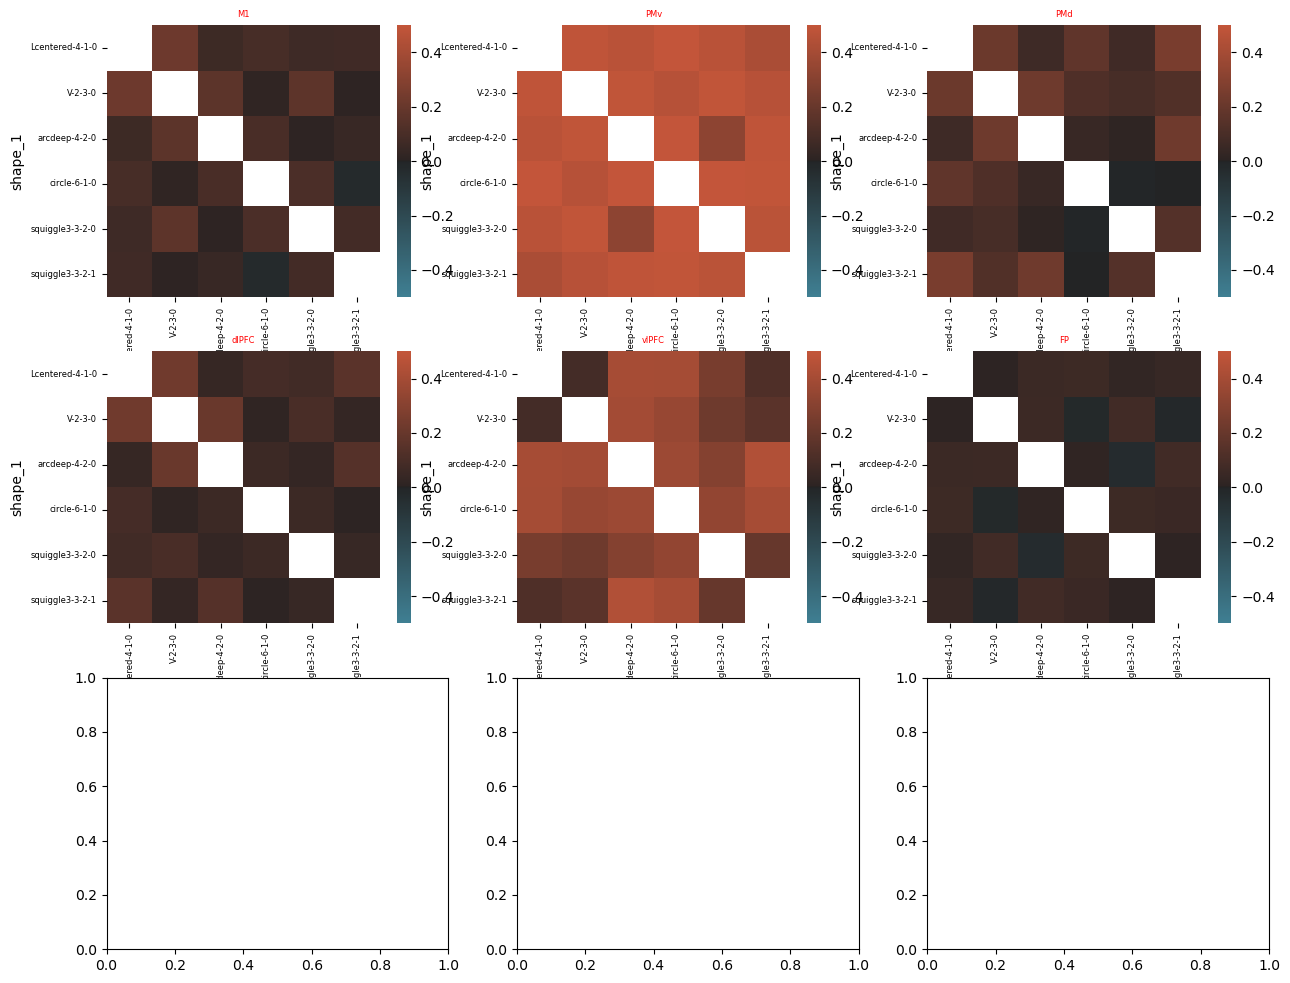

In [5]:
import os
SAVEDIR_PLOTS = f"{SAVEDIR_MULT}/PLOTS/PAIRWISE_DECODE"
os.makedirs(SAVEDIR_PLOTS, exist_ok=True)
### Plots

# (1) Pairwise, across all expts.

# (2) Scatterplot --> show that every shape is separated from every other shape.
DFSCORES = pd.concat(res_3).reset_index(drop=True)
# Rename shapes for Diego
from pythonlib.drawmodel.tokens import map_sh_to_new_sh
DFSCORES["shape_1"] = [map_sh_to_new_sh[sh] if sh in map_sh_to_new_sh else sh for sh in DFSCORES["shape_1"]]
DFSCORES["shape_2"] = [map_sh_to_new_sh[sh] if sh in map_sh_to_new_sh else sh for sh in DFSCORES["shape_2"]]
DFSCORES["shape_pair"] = [(row["shape_1"], row["shape_2"]) for _, row in DFSCORES.iterrows()]

from neuralmonkey.analyses.decode_good import decode_categorical_pairwise_plots
decode_categorical_pairwise_plots(DFSCORES, SAVEDIR_PLOTS)

# # Append a copy with shape 1 and 2 flipped (as this is symmetric)
# dftmp = DFSCORES.copy()
# dftmp["shape_1"] = DFSCORES["shape_2"]
# dftmp["shape_2"] = DFSCORES["shape_1"]
# dftmp["shape_pair"] = [(row["shape_1"], row["shape_2"]) for _, row in dftmp.iterrows()]

# DFSCORES_FULL = pd.concat([DFSCORES, dftmp]).reset_index(drop=True)
# from pythonlib.tools.pandastools import grouping_append_and_return_inner_items_good, plot_subplots_heatmap
# from pythonlib.tools.plottools import savefig

# annotate_heatmap = False
# grpdict = grouping_append_and_return_inner_items_good(DFSCORES_FULL, ["animal"])
# for grp, inds in grpdict.items():
#     dfscores = DFSCORES_FULL.iloc[inds].reset_index(drop=True)
#     shapes = sorted(dfscores["shape_1"].unique())
    
#     fig, axes = plot_subplots_heatmap(dfscores, "shape_1", "shape_2", "score_minus_50", "bregion", diverge=True, 
#                           annotate_heatmap=annotate_heatmap, ZLIMS=[-0.5, 0.5], 
#                           row_values=shapes, col_values=shapes, diverge_center_dark=True)
#     # plot_subplots_heatmap(dfscores, "shape_1", "shape_2", "score", "bregion", False, True, ZLIMS=[0,1], 
#     #                       row_values=shapes, col_values=shapes)    

#     # Color background, those cases without data.
#     for ax in axes.flatten():
#         # ax.set_facecolor('g')
#         ax.set_facecolor([0.85, 0.85, 0.85])
#         # ax.set_facecolor([0.1, 0.1, 0.1])
#         # ax.set_facecolor([0.2, 0.4, 0.2])
    
#     if False:
#         # Keep just the upper triangle
#         ma_ut = np.triu(np.ones_like(self.Xinput, dtype=bool), k=k)

#     savefig(fig, f"{SAVEDIR_PLOTS}/heatmap_pairwise_decode-animal={grp}.pdf")
#     plt.close("all")


# from pythonlib.tools.pandastools import grouping_append_and_return_inner_items_good, plot_subplots_heatmap
# grpdict = grouping_append_and_return_inner_items_good(DFSCORES_FULL, ["animal", "date"])
# for grp, inds in grpdict.items():
#     dfscores = DFSCORES_FULL.iloc[inds].reset_index(drop=True)
#     shapes = sorted(dfscores["shape_1"].unique())
#     fig, axes = plot_subplots_heatmap(dfscores, "shape_1", "shape_2", "score_minus_50", "bregion", diverge=True, 
#                           annotate_heatmap=annotate_heatmap, ZLIMS=[-0.5, 0.5], 
#                           row_values=shapes, col_values=shapes, diverge_center_dark=True)

#     # Color background, those cases without data.
#     for ax in axes.flatten():
#         ax.set_facecolor([0.85, 0.85, 0.85])

#     savefig(fig, f"{SAVEDIR_PLOTS}/heatmap_pairwise_decode-animal_date={grp}.pdf")
#     plt.close("all")
# def _compute_mask_shapes_exist(df, shapes_in_order, rowname, colname):
#     """
#     """
    
#     counts = np.zeros((len(shapes_in_order), len(shapes_in_order))) - np.inf
#     for i, lab1 in enumerate(shapes_in_order):
#         for j, lab2 in enumerate(shapes_in_order):
#             n = sum((df[rowname] == lab1) & (df[colname] == lab2))
#             counts[i, j] = n
#     assert np.all(counts>=0)

#     ma_exist = counts>0
#     plt.figure()
#     plt.imshow(ma_exist)

#     return counts, ma_exist
# counts, ma_exist = _compute_mask_shapes_exist(DFSCORES_FULL, shapes, "shape_1", "shape_2");
# ma_none = ~ma_exist
# ### Plot 1D histogram of decoding (highlighting if significantly > 0.5)
# from pythonlib.tools.pandastools import aggregGeneral, stringify_values
# import seaborn as sns

# # Agg across dates, so each shape_pair has one datapt
# DFSCORES_AGG = aggregGeneral(stringify_values(DFSCORES), ["shape_pair", "analysis_kind", "animal", "bregion"], ["score", "score_adjusted", "score_minus_50"])
# fig = sns.catplot(data=DFSCORES_AGG, x="bregion", y="score_minus_50", col="animal", jitter=True, alpha=0.3)
# for ax in fig.axes.flatten():
#     ax.axhline(0, color="k", alpha=0.5)
# savefig(fig, f"{SAVEDIR_PLOTS}/catplot_datapt=shape_pair-1.pdf")

# fig = sns.catplot(data=DFSCORES_AGG, x="bregion", y="score_minus_50", col="animal", kind="bar")
# for ax in fig.axes.flatten():
#     ax.axhline(0, color="k", alpha=0.5)
# savefig(fig, f"{SAVEDIR_PLOTS}/catplot_datapt=shape_pair-2.pdf")

# fig = sns.catplot(data=DFSCORES_AGG, x="bregion", y="score_minus_50", col="animal", kind="violin")
# for ax in fig.axes.flatten():
#     ax.axhline(0, color="k", alpha=0.5)
# savefig(fig, f"{SAVEDIR_PLOTS}/catplot_datapt=shape_pair-3.pdf")

# fig = sns.catplot(data=DFSCORES_AGG, x="bregion", y="score_minus_50", col="animal", kind="boxen", color="k")
# for ax in fig.axes.flatten():
#     ax.axhline(0, color="k", alpha=0.5)
# savefig(fig, f"{SAVEDIR_PLOTS}/catplot_datapt=shape_pair-4.pdf")

# # Plot for each date
# fig = sns.catplot(data=DFSCORES, x="bregion", y="score_minus_50", row="animal", col="date", jitter=True, alpha=0.3)
# # fig = sns.catplot(data=DFSCORES, x="bregion", y="score_minus_50", row="animal", col="date", kind="swarm", size=3)
# for ax in fig.axes.flatten():
#     ax.axhline(0, color="k", alpha=0.5)
# savefig(fig, f"{SAVEDIR_PLOTS}/catplot_datapt=shape_pair-5.pdf")

# fig = sns.catplot(data=DFSCORES, x="bregion", y="score_minus_50", row="animal", hue="date", kind="point")
# # fig = sns.catplot(data=DFSCORES, x="bregion", y="score_minus_50", row="animal", col="date", kind="swarm", size=3)
# for ax in fig.axes.flatten():
#     ax.axhline(0, color="k", alpha=0.5)
# savefig(fig, f"{SAVEDIR_PLOTS}/catplot_datapt=shape_pair-6.pdf")

# plt.close("all")
